## Multiple Linear Regression on Marketing Channels
This is a learning project that uses **KAGGLE** dataset to demonstrate the application of *Multiple Linear Regression* concepts in *Machine Learning* to predict the sales of products based on available advrtisement channels. 

**Columns :**
+ TV
+ Radio
+ Newspaper
+ Sales

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load Data

In [2]:
data = pd.read_csv('advertising.csv')
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


### Descriptive Analysis

In [3]:
str = f'Data Shape: {data.shape}' + '\n'
str += f'Data Columns: {data.columns}'
print( str )

Data Shape: (200, 5)
Data Columns: Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [4]:
print("Data Description:\n\n", data.describe())

Data Description:

        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


### Basic Data Cleaning

In [5]:
data.columns = [s.lower().replace(' ','_') for s in data.columns]

if 'unnamed:_0' in data.columns : 
    data.drop(columns=['unnamed:_0'], inplace=True)
    
if  data[data.duplicated()].any().any() : 
    data.drop_duplicates(inplace=True)

if data.isna().any().any() : 
    data.dropna(inplace=True)

### Exploratory Analysis - Variables Distribution & Correlations

array([[<Axes: title={'center': 'tv'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

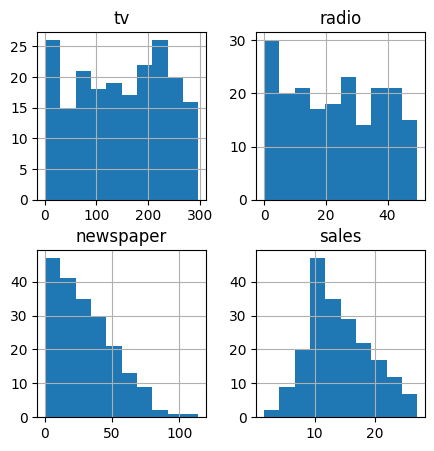

In [6]:
data.hist(figsize=(5,5))

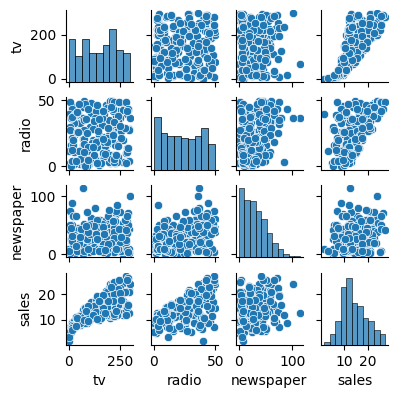

In [7]:
sns.pairplot(data[['tv','radio','newspaper', 'sales']],height=1)

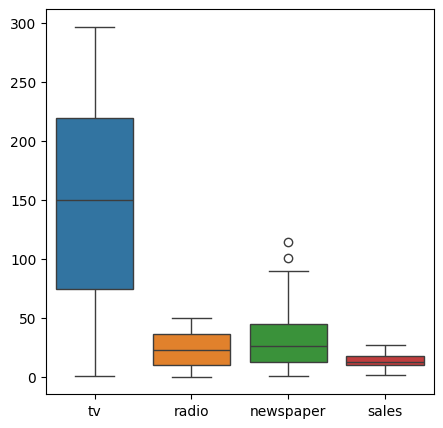

In [8]:
plt.figure(figsize=(5,5))
sns.boxplot(data)
plt.show()

                 tv     radio  newspaper     sales
tv         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


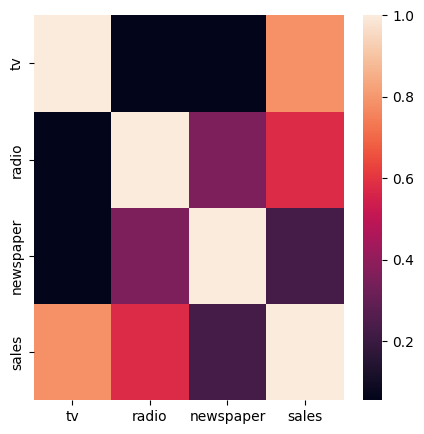

In [9]:
correlation = data.corr()
print(correlation)

plt.figure(figsize=(5,5))
sns.heatmap(data=correlation)
plt.show()

### Validate Predictors - Variance Threshold

In [10]:
from sklearn.feature_selection import VarianceThreshold

vt= VarianceThreshold()
vt.fit_transform(data[['tv', 'radio', 'newspaper']])
print(vt.get_support())

[ True  True  True]


### Split Dataset

In [11]:
from sklearn.model_selection import train_test_split

data['tv_radio'] = data.tv + data.radio
data['radio_newspaper'] = data.radio + data.newspaper

x = data[['tv','radio','newspaper','tv_radio']]
y = data['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

### Scale Predictors

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=['tv','radio','newspaper','tv_radio'])
x_test = pd.DataFrame(scaler.transform(x_test), columns=['tv','radio','newspaper','tv_radio'])

### Model

In [13]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Predictions

In [14]:
y_predict = model.predict(x_test)
score = model.score(x_test, y_test)

### Evaluation

In [15]:
from sklearn.metrics import mean_squared_error , root_mean_squared_error, r2_score

r2_score = r2_score(y_test,y_predict)
rmse = root_mean_squared_error(y_predict, y_test)
mse = mean_squared_error(y_predict, y_test)

### Results

In [16]:
print(f'score    : {score}')
print(f'r2_score : {r2_score}')
print(f'rmse     : {rmse}')
print(f'mse      : {mse}')

score    : 0.9073615858587188
r2_score : 0.9073615858587188
rmse     : 1.704667427572053
mse      : 2.9058910386251204
